<a href="https://colab.research.google.com/github/skywalker0803r/autorch/blob/main/examples/wadda_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/skywalker0803r/autorch.git

Cloning into 'autorch'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 323 (delta 19), reused 22 (delta 10), pack-reused 282
Receiving objects: 100% (323/323), 1.48 MiB | 6.05 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [2]:
from autorch.autorch import transferlearning
import torch
from torch import nn
from torch.autograd import Function
from torch import optim
from torch.utils.data import TensorDataset,DataLoader
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import xgboost
from sklearn.multioutput import MultiOutputRegressor
from sklearn.utils import shuffle
import warnings 
warnings.simplefilter('ignore')

In [3]:
def normalize(x):
  return x/x.sum(axis=1).values.reshape(-1,1)

# Load Data

In [4]:
src_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/train_4565.csv',index_col=0))
tgt_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/test_250.csv',index_col=0))

# get columns_name
x_col = ['T10','T50','T90','N+A']
N_col = ['C5N','C6N','C6A','C7N','C7A','C8N','C8A','C9N','C9A','C10N','C10A']
P_col = ['C5NP','C5IP','C6NP','C6IP','C7NP','C7IP','C8NP','C8IP','C9NP','C9IP','C10NP','C10IP']
y_col = src_data.drop(x_col,axis=1).columns.tolist()

# split some data for final testing
tgt_data,final_test_data = tgt_data.iloc[:200],tgt_data.iloc[200:]

# instance WADDA model

In [5]:
src_x,src_y = src_data[x_col],src_data[y_col]
tgt_x,tgt_y = tgt_data[x_col],tgt_data[y_col]
model = transferlearning.WADDA(src_x,src_y,tgt_x,tgt_y)

# Fit Xgboost

In [6]:
xgb_200 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(tgt_x,tgt_y)
xgb_4765 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(src_x.append(tgt_x),src_y.append(tgt_y))

# Fit WADDA

  0%|          | 0/3000 [00:00<?, ?it/s]

start train


  1%|          | 37/3000 [00:00<08:48,  5.61it/s]

ep:0 loss:3.8521382808685303


  5%|▍         | 144/3000 [00:00<02:59, 15.88it/s]

ep:100 loss:3.163564920425415


  9%|▊         | 256/3000 [00:00<01:04, 42.74it/s]

ep:200 loss:1.2100155353546143


 12%|█▏        | 367/3000 [00:01<00:25, 101.65it/s]

ep:300 loss:0.9033132791519165


 15%|█▍        | 448/3000 [00:01<00:15, 163.78it/s]

ep:400 loss:0.7441297769546509


 19%|█▉        | 581/3000 [00:01<00:08, 277.31it/s]

ep:500 loss:0.519658088684082


 22%|██▏       | 668/3000 [00:01<00:06, 333.68it/s]

ep:600 loss:0.49371498823165894


 25%|██▌       | 751/3000 [00:02<00:06, 356.37it/s]

ep:700 loss:0.46934977173805237


 29%|██▉       | 872/3000 [00:02<00:05, 377.30it/s]

ep:800 loss:0.39582160115242004


 32%|███▏      | 956/3000 [00:02<00:05, 395.20it/s]

ep:900 loss:0.33892950415611267


 36%|███▌      | 1078/3000 [00:03<00:04, 394.05it/s]

ep:1000 loss:0.37075209617614746


 39%|███▊      | 1157/3000 [00:03<00:04, 371.15it/s]

ep:1100 loss:0.4468803405761719


 43%|████▎     | 1280/3000 [00:03<00:04, 389.19it/s]

ep:1200 loss:0.36036416888237


 45%|████▌     | 1359/3000 [00:03<00:04, 383.96it/s]

ep:1300 loss:0.30157431960105896


 49%|████▉     | 1477/3000 [00:04<00:03, 381.90it/s]

ep:1400 loss:0.3439074456691742


 52%|█████▏    | 1554/3000 [00:04<00:03, 374.86it/s]

ep:1500 loss:0.29941555857658386


 56%|█████▌    | 1671/3000 [00:04<00:03, 378.99it/s]

ep:1600 loss:0.33133572340011597


 58%|█████▊    | 1750/3000 [00:04<00:03, 374.92it/s]

ep:1700 loss:0.2903106212615967


 62%|██████▏   | 1869/3000 [00:05<00:02, 384.20it/s]

ep:1800 loss:0.294303297996521


 65%|██████▍   | 1948/3000 [00:05<00:02, 381.00it/s]

ep:1900 loss:0.26164039969444275


 69%|██████▉   | 2068/3000 [00:05<00:02, 389.66it/s]

ep:2000 loss:0.32850170135498047


 72%|███████▏  | 2147/3000 [00:05<00:02, 381.08it/s]

ep:2100 loss:0.2728644013404846


 76%|███████▌  | 2266/3000 [00:06<00:01, 374.18it/s]

ep:2200 loss:0.24080467224121094


 78%|███████▊  | 2345/3000 [00:06<00:01, 375.15it/s]

ep:2300 loss:0.24049489200115204


 82%|████████▏ | 2463/3000 [00:06<00:01, 379.58it/s]

ep:2400 loss:0.25465020537376404


 85%|████████▍ | 2542/3000 [00:06<00:01, 379.77it/s]

ep:2500 loss:0.3245621919631958


 89%|████████▊ | 2662/3000 [00:07<00:00, 380.72it/s]

ep:2600 loss:0.229624941945076


 91%|█████████▏| 2739/3000 [00:07<00:00, 367.93it/s]

ep:2700 loss:0.26433756947517395


 95%|█████████▍| 2849/3000 [00:07<00:00, 346.43it/s]

ep:2800 loss:0.2538008391857147


 99%|█████████▊| 2960/3000 [00:08<00:00, 357.76it/s]

ep:2900 loss:0.21899892389774323


100%|██████████| 3000/3000 [00:08<00:00, 366.40it/s]


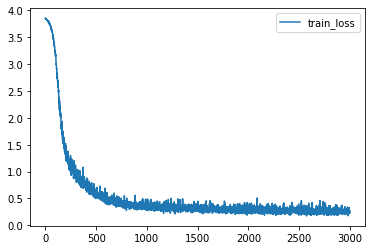

  0%|          | 28/10000 [00:00<01:11, 139.81it/s]

ep:0 d_loss:-0.048436831682920456 t_loss:0.03937341272830963 r_loss:2.81563138961792


  1%|          | 116/10000 [00:00<01:09, 142.73it/s]

ep:100 d_loss:-0.28208956122398376 t_loss:-0.4858943223953247 r_loss:1.4417580366134644


  2%|▏         | 218/10000 [00:01<01:13, 132.20it/s]

ep:200 d_loss:0.032437920570373535 t_loss:-0.6539850831031799 r_loss:1.3529866933822632


  3%|▎         | 322/10000 [00:02<01:08, 142.24it/s]

ep:300 d_loss:-0.040687769651412964 t_loss:-0.17077192664146423 r_loss:1.003326654434204


  4%|▍         | 429/10000 [00:03<01:06, 143.42it/s]

ep:400 d_loss:-0.11538103967905045 t_loss:0.20330457389354706 r_loss:0.9565083980560303


  5%|▌         | 520/10000 [00:03<01:06, 142.02it/s]

ep:500 d_loss:-0.07916553318500519 t_loss:0.0371476486325264 r_loss:0.8187141418457031


  6%|▋         | 627/10000 [00:04<01:07, 138.26it/s]

ep:600 d_loss:-0.032582446932792664 t_loss:-0.15506722033023834 r_loss:0.8006708025932312


  7%|▋         | 718/10000 [00:05<01:05, 142.14it/s]

ep:700 d_loss:-0.07479279488325119 t_loss:0.00998983159661293 r_loss:0.7373595833778381


  8%|▊         | 819/10000 [00:05<01:07, 136.99it/s]

ep:800 d_loss:-0.0842665284872055 t_loss:0.06870310008525848 r_loss:0.6707622408866882


  9%|▉         | 917/10000 [00:06<01:07, 134.68it/s]

ep:900 d_loss:-0.04560953378677368 t_loss:-0.09154917299747467 r_loss:0.6281597018241882


 10%|█         | 1016/10000 [00:07<01:07, 132.68it/s]

ep:1000 d_loss:-0.07320620119571686 t_loss:-0.025105025619268417 r_loss:0.5787414312362671


 11%|█         | 1122/10000 [00:08<01:11, 124.44it/s]

ep:1100 d_loss:-0.08441086858510971 t_loss:0.04563988372683525 r_loss:0.5900107622146606


 12%|█▏        | 1218/10000 [00:08<01:07, 129.85it/s]

ep:1200 d_loss:-0.05194506049156189 t_loss:-0.07498475909233093 r_loss:0.5913031697273254


 13%|█▎        | 1324/10000 [00:09<01:10, 123.07it/s]

ep:1300 d_loss:-0.07653885334730148 t_loss:0.029939226806163788 r_loss:0.5787809491157532


 14%|█▍        | 1419/10000 [00:10<01:06, 129.37it/s]

ep:1400 d_loss:-0.06129638850688934 t_loss:-0.02083364874124527 r_loss:0.5419617295265198


 15%|█▌        | 1528/10000 [00:11<01:05, 130.25it/s]

ep:1500 d_loss:-0.06279256939888 t_loss:-0.03459235653281212 r_loss:0.5018032789230347


 16%|█▋        | 1628/10000 [00:12<01:04, 130.31it/s]

ep:1600 d_loss:-0.07703618705272675 t_loss:0.027642875909805298 r_loss:0.5043587684631348


 17%|█▋        | 1722/10000 [00:12<01:05, 126.08it/s]

ep:1700 d_loss:-0.0649462640285492 t_loss:-0.04447558894753456 r_loss:0.516860842704773


 18%|█▊        | 1814/10000 [00:13<01:04, 126.34it/s]

ep:1800 d_loss:-0.07920993119478226 t_loss:0.025134161114692688 r_loss:0.5027855038642883


 19%|█▉        | 1919/10000 [00:14<01:04, 125.15it/s]

ep:1900 d_loss:-0.07129339873790741 t_loss:-0.02329736016690731 r_loss:0.5048219561576843


 20%|██        | 2018/10000 [00:15<00:58, 135.36it/s]

ep:2000 d_loss:-0.07037869095802307 t_loss:-0.003606517566367984 r_loss:0.541262686252594


 21%|██        | 2116/10000 [00:16<00:59, 133.18it/s]

ep:2100 d_loss:-0.058879442512989044 t_loss:-0.02833421714603901 r_loss:0.5273704528808594


 22%|██▏       | 2230/10000 [00:16<00:55, 140.05it/s]

ep:2200 d_loss:-0.07193776220083237 t_loss:0.004095554351806641 r_loss:0.48129576444625854


 23%|██▎       | 2316/10000 [00:17<00:56, 136.32it/s]

ep:2300 d_loss:-0.07133570313453674 t_loss:-0.033374886959791183 r_loss:0.45113927125930786


 24%|██▍       | 2416/10000 [00:18<00:57, 131.48it/s]

ep:2400 d_loss:-0.07759753614664078 t_loss:0.016351109370589256 r_loss:0.49223315715789795


 25%|██▌       | 2515/10000 [00:18<00:55, 134.52it/s]

ep:2500 d_loss:-0.06648743152618408 t_loss:-0.03548470139503479 r_loss:0.48427867889404297


 26%|██▌       | 2616/10000 [00:19<00:54, 135.32it/s]

ep:2600 d_loss:-0.07387401908636093 t_loss:-0.0024306452833116055 r_loss:0.44435086846351624


 27%|██▋       | 2715/10000 [00:20<00:55, 130.86it/s]

ep:2700 d_loss:-0.06426816433668137 t_loss:-0.024507228285074234 r_loss:0.4862135648727417


 28%|██▊       | 2815/10000 [00:21<00:52, 136.57it/s]

ep:2800 d_loss:-0.07134011387825012 t_loss:-0.010086877271533012 r_loss:0.47692084312438965


 29%|██▉       | 2923/10000 [00:22<00:57, 123.43it/s]

ep:2900 d_loss:-0.06284033507108688 t_loss:-0.027196917682886124 r_loss:0.45949462056159973


 30%|███       | 3016/10000 [00:22<00:55, 126.28it/s]

ep:3000 d_loss:-0.07084648311138153 t_loss:-0.00371806463226676 r_loss:0.4459945857524872


 31%|███       | 3123/10000 [00:23<00:53, 128.26it/s]

ep:3100 d_loss:-0.06644871830940247 t_loss:-0.021523403003811836 r_loss:0.4332873225212097


 32%|███▏      | 3225/10000 [00:24<00:48, 138.76it/s]

ep:3200 d_loss:-0.0648697167634964 t_loss:-0.0032253831159323454 r_loss:0.4393453896045685


 33%|███▎      | 3325/10000 [00:25<00:48, 138.46it/s]

ep:3300 d_loss:-0.06603826582431793 t_loss:-0.018646610900759697 r_loss:0.4448407292366028


 34%|███▍      | 3424/10000 [00:25<00:47, 138.34it/s]

ep:3400 d_loss:-0.07444964349269867 t_loss:0.013366211205720901 r_loss:0.455933541059494


 35%|███▌      | 3523/10000 [00:26<00:48, 134.39it/s]

ep:3500 d_loss:-0.06899973750114441 t_loss:-0.0297479759901762 r_loss:0.42571595311164856


 36%|███▌      | 3617/10000 [00:27<00:52, 121.61it/s]

ep:3600 d_loss:-0.06503494828939438 t_loss:-0.026570040732622147 r_loss:0.4116433262825012


 37%|███▋      | 3724/10000 [00:28<00:49, 127.09it/s]

ep:3700 d_loss:-0.07190451771020889 t_loss:-0.00451856991276145 r_loss:0.4434361159801483


 38%|███▊      | 3822/10000 [00:29<00:46, 131.76it/s]

ep:3800 d_loss:-0.07108961045742035 t_loss:-0.008561385795474052 r_loss:0.4670783281326294


 39%|███▉      | 3921/10000 [00:29<00:46, 131.52it/s]

ep:3900 d_loss:-0.06845670193433762 t_loss:-0.0035899251233786345 r_loss:0.43413427472114563


 40%|████      | 4015/10000 [00:30<00:47, 126.85it/s]

ep:4000 d_loss:-0.06984114646911621 t_loss:-0.016472797840833664 r_loss:0.44902071356773376


 41%|████      | 4123/10000 [00:31<00:45, 129.50it/s]

ep:4100 d_loss:-0.0691697970032692 t_loss:-0.005567527841776609 r_loss:0.4037599265575409


 42%|████▏     | 4218/10000 [00:32<00:44, 128.75it/s]

ep:4200 d_loss:-0.06585514545440674 t_loss:-0.012889633886516094 r_loss:0.4972996115684509


 43%|████▎     | 4317/10000 [00:32<00:42, 132.22it/s]

ep:4300 d_loss:-0.06646333634853363 t_loss:-0.010373860597610474 r_loss:0.4384247362613678


 44%|████▍     | 4422/10000 [00:33<00:41, 134.87it/s]

ep:4400 d_loss:-0.0636942982673645 t_loss:-0.04328818619251251 r_loss:0.44999632239341736


 45%|████▌     | 4520/10000 [00:34<00:41, 131.06it/s]

ep:4500 d_loss:-0.07027287781238556 t_loss:-0.0010580437956377864 r_loss:0.42345649003982544


 46%|████▋     | 4627/10000 [00:35<00:42, 126.61it/s]

ep:4600 d_loss:-0.06659073382616043 t_loss:-0.006399295758455992 r_loss:0.43937981128692627


 47%|████▋     | 4723/10000 [00:35<00:41, 126.96it/s]

ep:4700 d_loss:-0.07321948558092117 t_loss:0.009488045237958431 r_loss:0.4360400438308716


 48%|████▊     | 4822/10000 [00:36<00:38, 133.58it/s]

ep:4800 d_loss:-0.06790581345558167 t_loss:-0.0013462956994771957 r_loss:0.44898125529289246


 49%|████▉     | 4923/10000 [00:37<00:37, 136.69it/s]

ep:4900 d_loss:-0.06759926676750183 t_loss:-0.021672740578651428 r_loss:0.41511300206184387


 50%|█████     | 5022/10000 [00:38<00:36, 135.41it/s]

ep:5000 d_loss:-0.07275420427322388 t_loss:-0.014257414266467094 r_loss:0.43804818391799927


 51%|█████     | 5124/10000 [00:38<00:34, 141.51it/s]

ep:5100 d_loss:-0.07416440546512604 t_loss:0.009101875126361847 r_loss:0.4234260618686676


 52%|█████▏    | 5221/10000 [00:39<00:37, 126.19it/s]

ep:5200 d_loss:-0.06674676388502121 t_loss:-0.009991824626922607 r_loss:0.40704211592674255


 53%|█████▎    | 5318/10000 [00:40<00:35, 130.65it/s]

ep:5300 d_loss:-0.06694278120994568 t_loss:-0.022025391459465027 r_loss:0.410785436630249


 54%|█████▍    | 5428/10000 [00:41<00:34, 133.86it/s]

ep:5400 d_loss:-0.07030949741601944 t_loss:-0.021305203437805176 r_loss:0.39239901304244995


 55%|█████▌    | 5526/10000 [00:42<00:33, 133.23it/s]

ep:5500 d_loss:-0.07635650038719177 t_loss:0.001899846363812685 r_loss:0.3526691794395447


 56%|█████▋    | 5625/10000 [00:42<00:32, 132.78it/s]

ep:5600 d_loss:-0.06833510845899582 t_loss:-0.01784384995698929 r_loss:0.4151937663555145


 57%|█████▋    | 5724/10000 [00:43<00:32, 133.36it/s]

ep:5700 d_loss:-0.07118923962116241 t_loss:-0.006490083411335945 r_loss:0.3965216875076294


 58%|█████▊    | 5824/10000 [00:44<00:30, 135.47it/s]

ep:5800 d_loss:-0.05957964435219765 t_loss:-0.03451809287071228 r_loss:0.4155868887901306


 59%|█████▉    | 5922/10000 [00:45<00:30, 134.64it/s]

ep:5900 d_loss:-0.057360246777534485 t_loss:-0.027391457930207253 r_loss:0.40267297625541687


 60%|██████    | 6021/10000 [00:45<00:29, 135.07it/s]

ep:6000 d_loss:-0.05486680194735527 t_loss:-0.004820242524147034 r_loss:0.36757829785346985


 61%|██████▏   | 6125/10000 [00:46<00:27, 142.78it/s]

ep:6100 d_loss:-0.04347015172243118 t_loss:-0.025703009217977524 r_loss:0.3948156237602234


 62%|██████▏   | 6226/10000 [00:47<00:28, 130.65it/s]

ep:6200 d_loss:-0.043649666011333466 t_loss:-0.0048087118193507195 r_loss:0.3807048499584198


 63%|██████▎   | 6327/10000 [00:47<00:26, 139.16it/s]

ep:6300 d_loss:-0.03669003024697304 t_loss:-0.01968030259013176 r_loss:0.4115293025970459


 64%|██████▍   | 6425/10000 [00:48<00:26, 136.76it/s]

ep:6400 d_loss:-0.0445733405649662 t_loss:-0.00047708937199786305 r_loss:0.42458853125572205


 65%|██████▌   | 6526/10000 [00:49<00:25, 134.03it/s]

ep:6500 d_loss:-0.04270796850323677 t_loss:0.0008838967769406736 r_loss:0.45444607734680176


 66%|██████▋   | 6625/10000 [00:50<00:25, 134.14it/s]

ep:6600 d_loss:-0.03957585245370865 t_loss:-0.010955516248941422 r_loss:0.3787350058555603


 67%|██████▋   | 6723/10000 [00:50<00:24, 132.90it/s]

ep:6700 d_loss:-0.039359815418720245 t_loss:-0.02366657927632332 r_loss:0.37529581785202026


 68%|██████▊   | 6821/10000 [00:51<00:25, 122.53it/s]

ep:6800 d_loss:-0.04034081846475601 t_loss:-0.020023861899971962 r_loss:0.42380961775779724


 69%|██████▉   | 6928/10000 [00:52<00:22, 133.95it/s]

ep:6900 d_loss:-0.04530815780162811 t_loss:-0.0010899959597736597 r_loss:0.36166515946388245


 70%|███████   | 7028/10000 [00:53<00:22, 134.17it/s]

ep:7000 d_loss:-0.039943307638168335 t_loss:-0.02678796648979187 r_loss:0.43660616874694824


 71%|███████▏  | 7126/10000 [00:54<00:21, 132.72it/s]

ep:7100 d_loss:-0.03822805732488632 t_loss:-0.028108565136790276 r_loss:0.36192551255226135


 72%|███████▏  | 7225/10000 [00:54<00:20, 137.49it/s]

ep:7200 d_loss:-0.042578473687171936 t_loss:-0.009789993055164814 r_loss:0.3574853241443634


 73%|███████▎  | 7324/10000 [00:55<00:20, 131.13it/s]

ep:7300 d_loss:-0.03569160774350166 t_loss:-0.03821876645088196 r_loss:0.4064781069755554


 74%|███████▍  | 7423/10000 [00:56<00:19, 129.30it/s]

ep:7400 d_loss:-0.042957089841365814 t_loss:0.0008819066570140421 r_loss:0.3560999929904938


 75%|███████▌  | 7525/10000 [00:57<00:20, 121.47it/s]

ep:7500 d_loss:-0.04200088977813721 t_loss:-0.01732378639280796 r_loss:0.339898020029068


 76%|███████▌  | 7617/10000 [00:57<00:19, 122.31it/s]

ep:7600 d_loss:-0.04454920440912247 t_loss:-0.002601258922368288 r_loss:0.3800921142101288


 77%|███████▋  | 7722/10000 [00:58<00:17, 126.59it/s]

ep:7700 d_loss:-0.0428876131772995 t_loss:-0.009984246455132961 r_loss:0.4190313518047333


 78%|███████▊  | 7818/10000 [00:59<00:16, 132.88it/s]

ep:7800 d_loss:-0.03921366482973099 t_loss:-0.012409341521561146 r_loss:0.3521013557910919


 79%|███████▉  | 7917/10000 [01:00<00:15, 134.35it/s]

ep:7900 d_loss:-0.04154473543167114 t_loss:-0.008552031591534615 r_loss:0.38670995831489563


 80%|████████  | 8026/10000 [01:01<00:15, 127.49it/s]

ep:8000 d_loss:-0.043299321085214615 t_loss:-0.016364755108952522 r_loss:0.4076029658317566


 81%|████████  | 8122/10000 [01:01<00:14, 130.72it/s]

ep:8100 d_loss:-0.04464175924658775 t_loss:0.0040514818392694 r_loss:0.35864078998565674


 82%|████████▏ | 8221/10000 [01:02<00:13, 134.23it/s]

ep:8200 d_loss:-0.03735595569014549 t_loss:-0.0233444981276989 r_loss:0.38810527324676514


 83%|████████▎ | 8322/10000 [01:03<00:13, 128.39it/s]

ep:8300 d_loss:-0.041210781782865524 t_loss:-0.014051071368157864 r_loss:0.39087411761283875


 84%|████████▍ | 8417/10000 [01:04<00:12, 125.03it/s]

ep:8400 d_loss:-0.04122159257531166 t_loss:-0.004894257057458162 r_loss:0.33399736881256104


 85%|████████▌ | 8513/10000 [01:04<00:11, 129.77it/s]

ep:8500 d_loss:-0.04141415283083916 t_loss:-0.023791812360286713 r_loss:0.3701929450035095


 86%|████████▌ | 8622/10000 [01:05<00:10, 128.37it/s]

ep:8600 d_loss:-0.04118262976408005 t_loss:-0.01336011104285717 r_loss:0.36482566595077515


 87%|████████▋ | 8717/10000 [01:06<00:09, 132.83it/s]

ep:8700 d_loss:-0.04038366675376892 t_loss:-0.022764092311263084 r_loss:0.389164000749588


 88%|████████▊ | 8816/10000 [01:07<00:08, 132.87it/s]

ep:8800 d_loss:-0.041746653616428375 t_loss:-0.006685611326247454 r_loss:0.41177666187286377


 89%|████████▉ | 8919/10000 [01:07<00:07, 143.40it/s]

ep:8900 d_loss:-0.04083215072751045 t_loss:-0.012604880146682262 r_loss:0.34800267219543457


 90%|█████████ | 9020/10000 [01:08<00:07, 138.56it/s]

ep:9000 d_loss:-0.044766876846551895 t_loss:-0.004818118177354336 r_loss:0.41545769572257996


 91%|█████████ | 9121/10000 [01:09<00:06, 136.00it/s]

ep:9100 d_loss:-0.04271698743104935 t_loss:-0.006612508557736874 r_loss:0.3792431950569153


 92%|█████████▏| 9219/10000 [01:10<00:06, 120.90it/s]

ep:9200 d_loss:-0.04003726691007614 t_loss:-0.028522731736302376 r_loss:0.30779731273651123


 93%|█████████▎| 9318/10000 [01:11<00:05, 132.30it/s]

ep:9300 d_loss:-0.04271998256444931 t_loss:-0.007531092502176762 r_loss:0.38303908705711365


 94%|█████████▍| 9415/10000 [01:11<00:04, 135.68it/s]

ep:9400 d_loss:-0.045887790620326996 t_loss:0.0007585732964798808 r_loss:0.3776629567146301


 95%|█████████▌| 9528/10000 [01:12<00:03, 134.69it/s]

ep:9500 d_loss:-0.041694145649671555 t_loss:-0.0052010309882462025 r_loss:0.4044843018054962


 96%|█████████▋| 9627/10000 [01:13<00:02, 134.95it/s]

ep:9600 d_loss:-0.04489125311374664 t_loss:-0.0042755939066410065 r_loss:0.4072433114051819


 97%|█████████▋| 9726/10000 [01:14<00:02, 129.47it/s]

ep:9700 d_loss:-0.04044478014111519 t_loss:-0.006124122068285942 r_loss:0.324753075838089


 98%|█████████▊| 9819/10000 [01:14<00:01, 129.04it/s]

ep:9800 d_loss:-0.0443100780248642 t_loss:-0.020309673622250557 r_loss:0.3572046458721161


 99%|█████████▉| 9917/10000 [01:15<00:00, 130.97it/s]

ep:9900 d_loss:-0.04826359823346138 t_loss:0.008697409182786942 r_loss:0.3669702708721161


100%|██████████| 10000/10000 [01:16<00:00, 131.27it/s]


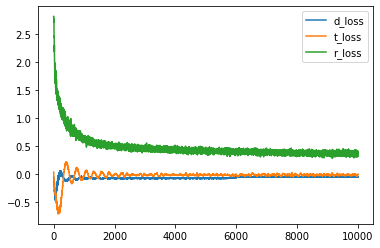

end train


In [7]:
model.train()

# model predict

In [8]:
x_test = final_test_data[x_col]
y_test = final_test_data[y_col]

In [9]:
adda_y_hat = model.predict(x_test)
adda_y_hat.index = x_test.index
xgb_200_y_hat = pd.DataFrame(xgb_200.predict(x_test),index=x_test.index,columns=y_col)
xgb_4765_y_hat = pd.DataFrame(xgb_4765.predict(x_test),index=x_test.index,columns=y_col)

# evaluate

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def show_metrics(y_pred,y_real):
  res = pd.DataFrame(index=y_pred.columns,columns=['R2','RMSE','MAPE'])
  for i in y_pred.columns:
    res.loc[i,'R2'] = r2_score(y_real[i],y_pred[i])
    res.loc[i,'RMSE'] = np.sqrt(mean_squared_error(y_real[i],y_pred[i]))
    res.loc[i,'MAPE'] = mape(y_real[i],y_pred[i])
  res.loc['AVG'] = res.mean(axis=0)
  return res

In [11]:
adda_res = show_metrics(adda_y_hat,y_test)
adda_res.tail(1)

,R2,RMSE,MAPE
AVG,0.706796,0.84494,72.2758


In [12]:
xgb_200_res = show_metrics(xgb_200_y_hat,y_test)
xgb_200_res.tail(1)

,R2,RMSE,MAPE
AVG,-3.74528,3.37499,1254.87


In [13]:
xgb_4765_res = show_metrics(xgb_4765_y_hat,y_test)
xgb_4765_res.tail(1)

,R2,RMSE,MAPE
AVG,-16.7754,4.36025,1348.71


# check total == 100

In [14]:
adda_y_hat.sum(axis=1).head(5)

192    96.277092
215    97.970459
141    98.785416
225    99.108482
198    96.127609
dtype: float32

In [15]:
xgb_200_y_hat.sum(axis=1).head(5)

192    112.181259
215    112.181259
141    112.181259
225    112.181259
198    112.181259
dtype: float32

In [16]:
xgb_4765_y_hat.sum(axis=1).head(5)

192    105.561745
215    105.561745
141    105.561745
225    105.561745
198    105.561745
dtype: float32

# check total N+A == N+A

In [17]:
for i,j in zip(adda_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

56.71189880371094 59.3345710170856
52.24276351928711 53.18458445415265
53.085838317871094 53.9817234204085
53.98777389526367 55.67491975663514
48.441444396972656 50.59984835976506


In [18]:
for i,j in zip(xgb_200_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

65.81510162353516 59.3345710170856
65.81510162353516 53.18458445415265
65.81510162353516 53.9817234204085
65.81510162353516 55.67491975663514
65.81510162353516 50.59984835976506


In [19]:
for i,j in zip(xgb_4765_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

74.76630401611328 59.3345710170856
74.76630401611328 53.18458445415265
74.76630401611328 53.9817234204085
74.76630401611328 55.67491975663514
74.76630401611328 50.59984835976506


# convert_predict 後處理 以符合案子需求

In [20]:
x_test['P'] = 100 - x_test['N+A']

In [21]:
def convert_predict(y_pred):
  y_pred[N_col] = normalize(y_pred[N_col])*x_test[['N+A']].values
  y_pred[P_col] = normalize(y_pred[P_col])*x_test[['P']].values
  return y_pred

In [22]:
show_metrics(convert_predict(adda_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,0.715642,0.826025,71.724


In [23]:
show_metrics(convert_predict(xgb_4765_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,-7.16321,3.83336,801.841


In [24]:
show_metrics(convert_predict(xgb_200_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,-3.17786,2.96855,764.895


# after convert check total and N+A sum

In [25]:
convert_predict(adda_y_hat).sum(axis=1).head(5)

192    100.0
215    100.0
141    100.0
225    100.0
198    100.0
dtype: float64

In [26]:
convert_predict(xgb_4765_y_hat).sum(axis=1).head(5)

192    100.0
215    100.0
141    100.0
225    100.0
198    100.0
dtype: float64

In [27]:
convert_predict(xgb_200_y_hat).sum(axis=1).head(5)

192    100.0
215    100.0
141    100.0
225    100.0
198    100.0
dtype: float64

In [28]:
for i,j in zip(adda_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

59.33457101708561 59.3345710170856
53.184584454152656 53.18458445415265
53.98172342040851 53.9817234204085
55.67491975663514 55.67491975663514
50.59984835976506 50.59984835976506


In [29]:
for i,j in zip(xgb_200_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

59.334571017085594 59.3345710170856
53.18458445415265 53.18458445415265
53.98172342040851 53.9817234204085
55.674919756635155 55.67491975663514
50.59984835976507 50.59984835976506


In [30]:
for i,j in zip(xgb_4765_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

59.334571017085594 59.3345710170856
53.18458445415266 53.18458445415265
53.98172342040851 53.9817234204085
55.67491975663515 55.67491975663514
50.599848359765055 50.59984835976506
